In [407]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from pylab import rcParams
%pylab inline

Populating the interactive namespace from numpy and matplotlib


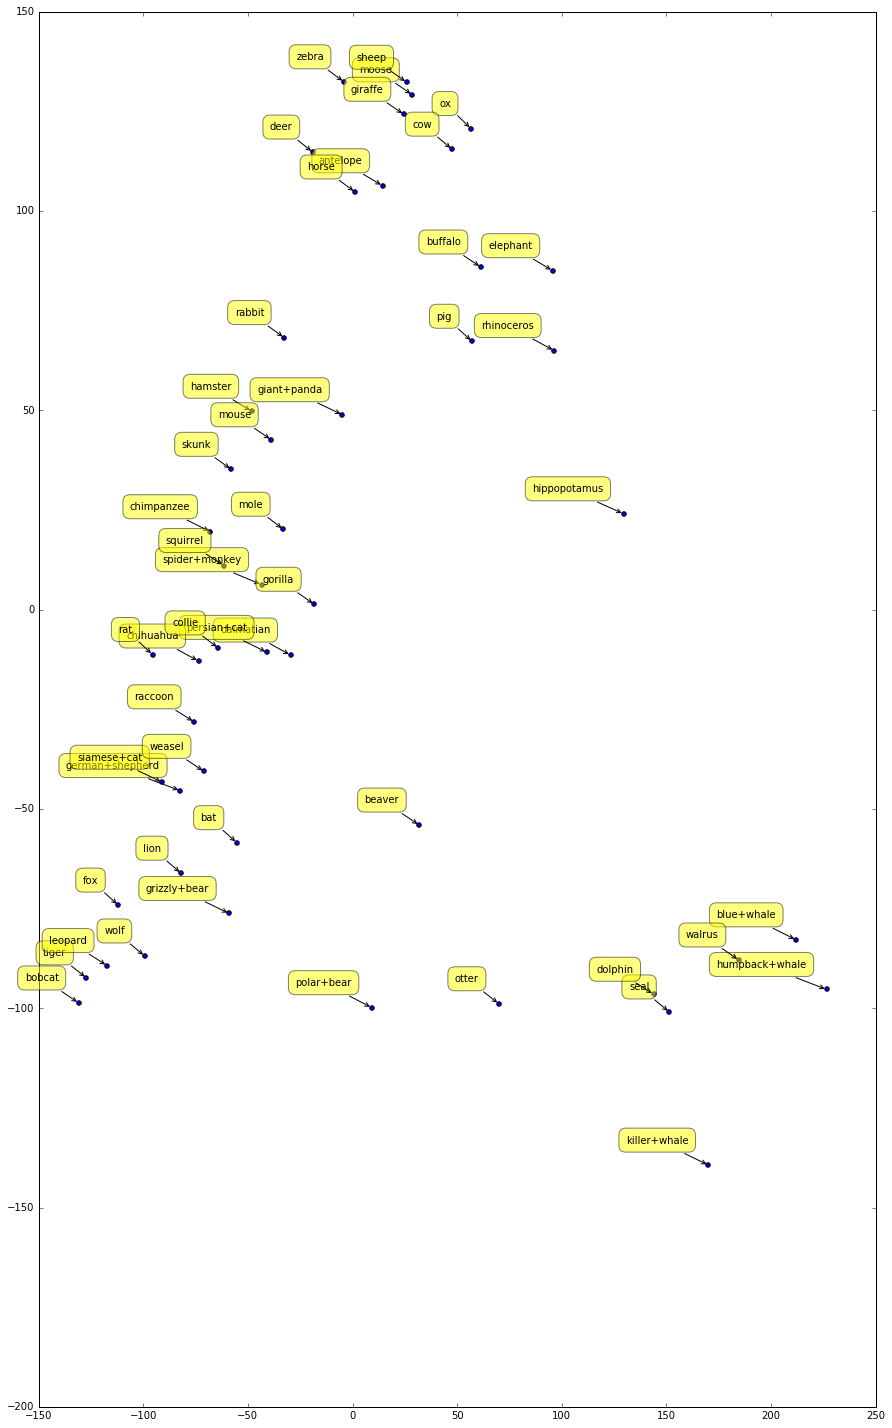

In [409]:
####Problem 4####

####Loading data####
data=np.loadtxt('predicate-matrix-continuous.txt')
names=np.genfromtxt('classes.txt', dtype=None, names=['Animal ID','Animal Name'],delimiter='\t')

####using PCA and transforming data onto 2-d space####
pca = PCA(n_components=2)
pca.fit(data)
transformed_data= pca.transform(data)

####plotting the data in 2d####
fig, ax = plt.subplots()
ax.scatter(transformed_data[:,0],transformed_data[:,1])
rcParams['figure.figsize'] = 15, 25

####labeling each point####
ann=[]
for label, x, y in zip([lab[1] for lab in names], transformed_data[:, 0], transformed_data[:, 1]):
    ann.append(ax.annotate(
        label, 
        xy = (x, y), xytext = (-20, 20),xycoords='data',
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.7', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0')))
    

Embedding 85 features into 2 main features makes sense as the animals with the same characteristics are still within the same approximate clusters. For example at the lower corners one we can still see that the **wild see creatures like blue whale, dolphin, humpack whale, seal** are within the same approximity. And on the very top center we can see **deer, horse, cow, sheep, zebra and other ruminant mammals** are within the same approximate clusters, evern though we have reduced the 85 feature to 2 features by projecting the 85 features onto the first two eigen vectors of the entire feature sets with the highest variance but **these two main direction of data (features) still contains significant amount of data that can be used for accurate clustering**

In [410]:
####Problem 5####

####MNIST loader####
%pylab inline
from struct import unpack
import numpy as np
import matplotlib.pylab as plt 

def loadmnist(imagefile, labelfile):

    # Open the images with gzip in read binary mode
    images = open(imagefile, 'rb')
    labels = open(labelfile, 'rb')

    # Get metadata for images
    images.read(4)  # skip the magic_number
    number_of_images = images.read(4)
    number_of_images = unpack('>I', number_of_images)[0]
    rows = images.read(4)
    rows = unpack('>I', rows)[0]
    cols = images.read(4)
    cols = unpack('>I', cols)[0]

    # Get metadata for labels
    labels.read(4)
    N = labels.read(4)
    N = unpack('>I', N)[0]

    # Get data
    x = np.zeros((N, rows*cols), dtype=np.uint8)  # Initialize numpy array
    y = np.zeros(N, dtype=np.uint8)  # Initialize numpy array
    for i in range(N):
        for j in range(rows*cols):
            tmp_pixel = images.read(1)  # Just a single byte
            tmp_pixel = unpack('>B', tmp_pixel)[0]
            x[i][j] = tmp_pixel
        tmp_label = labels.read(1)
        y[i] = unpack('>B', tmp_label)[0]

    images.close()
    labels.close()
    return (x, y)

def displaychar(image):
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.axis('off')
    plt.show()

Populating the interactive namespace from numpy and matplotlib


In [411]:
####Problem 4 part a####

####loading the data####
x,y = loadmnist ('train-images-idx3-ubyte', 'train-labels-idx1-ubyte')

####calculating the fraction of lost data in terms of variance ration for each K####
K=[200, 150, 100, 50, 25]
lost_frac={}
i=0
for k in set(K):
    pca = PCA(n_components=k)
    lost_frac[k]=1-sum(pca.fit(x).explained_variance_ratio_)
    i+=1
lost_frac

{25: 0.30819509120003918,
 50: 0.17535313666652752,
 100: 0.085371427560492319,
 150: 0.051643581185416787,
 200: 0.033552652298947661}

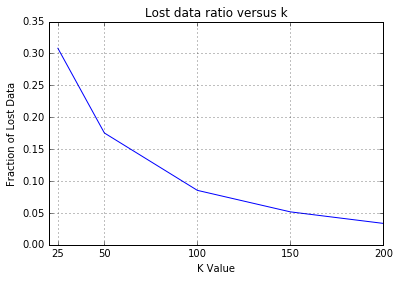

In [412]:
####plotting the fraction of lost data versus k####
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
k_val=[i[0] for i in lost_frac_sorted]
lost_frac=[i[1] for i in lost_frac_sorted]
fig, ax = plt.subplots()
ax.plot(k_val, lost_frac)
ax.xaxis.set_major_locator(FixedLocator(K))
ax.grid(True)
ax.set_xlabel('K Value')
ax.set_ylabel('Fraction of Lost Data')
ax.set_title('Lost data ratio versus k')

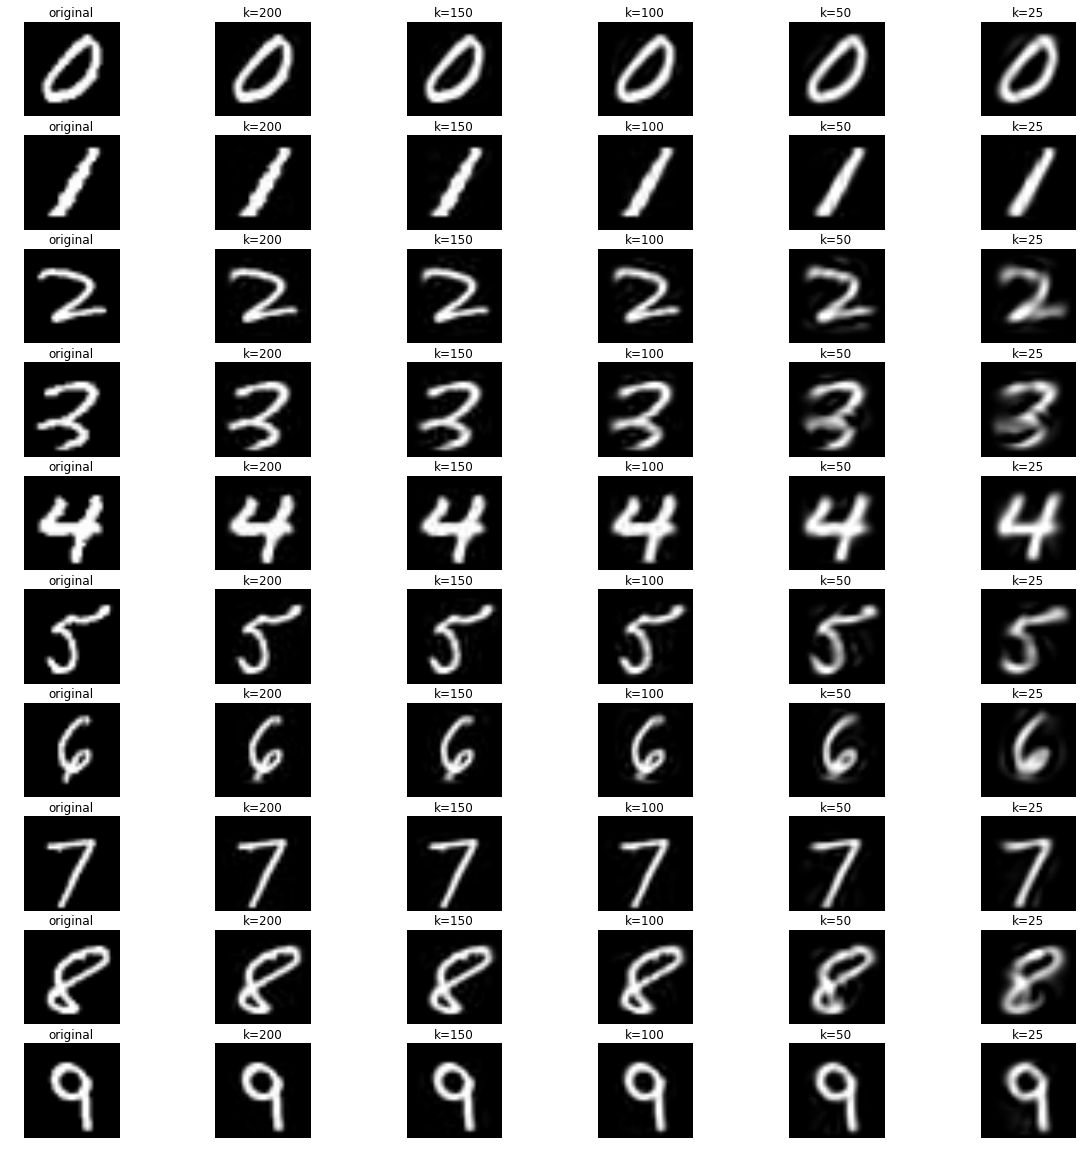

In [413]:
####Problem 4 part b####
####applying PCA, calculating F_j(k), reconstructing hte digits, and plotting them for each k#### 
fig, axarr = plt.subplots(10, 6, figsize=(20,20))
digits=range(10)
K=[200, 150, 100, 50, 25]
lost_frac_digit={}
for digit in digits: 
    y_index=np.where(y==digit)
    x_digit=x[y_index,:][0,:,:]
    random_select=randint(0, x_digit.shape[0])
    axarr[digit,0].imshow(np.reshape(x_digit[random_select], (28,28)), cmap=plt.cm.gray)
    axarr[digit,0].axis('off')
    axarr[digit,0].set_title("original")
    for k in K:
        pca = PCA(n_components=k)
        ####calculating the F_j(k)####
        lost_frac_digit[(digit,k)]=1-sum(pca.fit(x_digit).explained_variance_ratio_)
        transformed_digit=pca.fit_transform(x_digit)
        ####reconstructing the digit from the transformed PCA digit####
        constructed_digit=np.clip(pca.inverse_transform(transformed_digit),0,255)
        axarr[digit,K.index(k)+1].imshow(np.reshape(constructed_digit[random_select], (28,28)), cmap=plt.cm.gray)
        axarr[digit,K.index(k)+1].axis('off')
        axarr[digit,K.index(k)+1].set_title("k="+str(k))

In [414]:
####importing the F_j(K) to a DataFrame for better visibility####
loss_frac_DF=pd.DataFrame()
temp_DF=pd.DataFrame()
digits=range(10)
K=[200, 150, 100, 50, 25]
for k in K:
    tmp_list=[]
    for digit in digits:
        tmp_list.append(lost_frac_digit[(digit,k)])
    temp_DF=pd.DataFrame(tmp_list, columns=[k])
    loss_frac_DF=pd.concat([loss_frac_DF,temp_DF], axis=1)

loss_frac_DF

,200,150,100,50,25
0,0.020953,0.034483,0.059464,0.119590,0.207508
1,0.006705,0.014854,0.030986,0.073012,0.131318
2,0.028351,0.046034,0.078518,0.161913,0.284332
3,0.026178,0.043591,0.076171,0.159073,0.275770
4,0.025570,0.042653,0.073684,0.148018,0.253226
5,0.023850,0.040013,0.070948,0.149749,0.263515
6,0.019147,0.032724,0.057947,0.122372,0.222986
7,0.021417,0.036308,0.063601,0.128934,0.222289
8,0.025176,0.043149,0.077166,0.167942,0.300042
9,0.017133,0.031037,0.057647,0.123549,0.225424


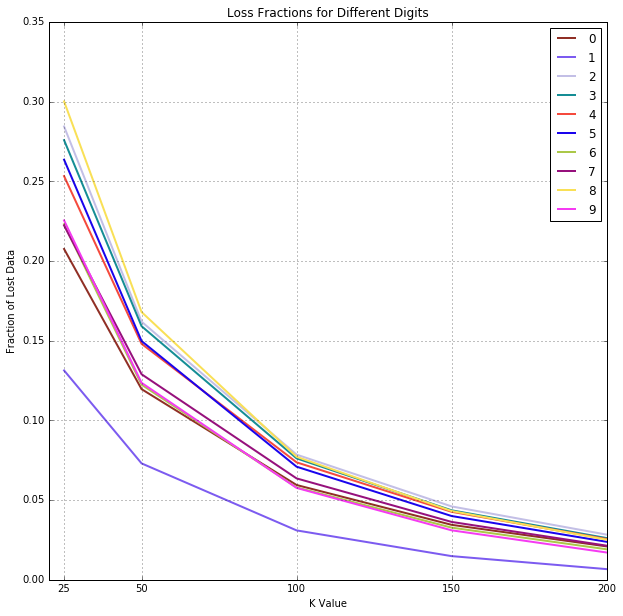

In [415]:
####Plotting the F_j(k) to determine the digits least vunlnerable to dimensionality reduction####
fig, ax = plt.subplots(figsize=(10,10))
for digit in digits:
    ax.plot(K, loss_frac_DF.loc[digit], linewidth=2.0, c=np.random.rand(3,1), label=digit)
    ax.legend()
ax.xaxis.set_major_locator(FixedLocator(K))
ax.grid(True)
ax.set_xlabel('K Value')
ax.set_ylabel('Fraction of Lost Data')
ax.set_title('Loss Fractions for Different Digits')

Based on the plot above, **digit 1** is the **leaset susceptible digit** to losing data (reducing dimentions of its features) and is the most amenable digit to low dimention projection. 

**digit 8** on the other hand is the **most susceptible digit** to losing data (reducing dimentions of its features).